In [95]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import sympy as sy
import math as math

## Exercise 1

In [5]:
def condnum(A):
    σ = la.svd(A)[1]
    cnum = σ[0] / σ[-1]
    return cnum

A = np.random.rand(5, 5)

print("My number is close to scipys:", condnum(A) - np.linalg.cond(A))
Q = la.qr(A)[0]
print("Orthonormals have QR decomp of 1:", condnum(Q))

My number is close to scipys: -7.105427357601002e-15
Orthonormals have QR decomp of 1: 1.0000000000000007


## Exercise 2

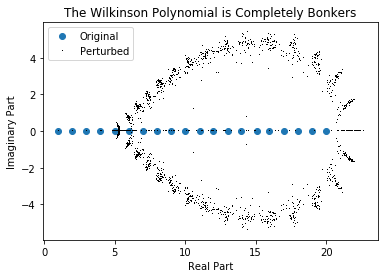

The estimated absolute condition number is 3.47148024654731e-9
The estimated relative condition number is 2395991489.37256


In [7]:
# Define wilkinson polynomial
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
# find roots
trueroots = np.roots(np.poly1d(w_coeffs))
# Plot (only real coeffs.)
plt.plot(trueroots, np.zeros(20), 'o', label = "Original")
# Initialize storage lists
acnlist = []
rcnlist = []
# Now loop over 100 perturbations
for i in range(100):
    #Initialize perturbation
    c = np.random.normal(1, 1e-10, 21)
    newcoeffs = w_coeffs * c
    newroots = np.roots(np.poly1d(newcoeffs))
    if i == 98:
        plt.plot(newroots.real, newroots.imag, 'k,', label = "Perturbed") 
        plt.xlabel("Real Part")
        plt.ylabel("Imaginary Part")
        plt.legend()
        plt.title("The Wilkinson Polynomial is Completely Bonkers")
    else:
        plt.plot(newroots.real, newroots.imag, 'k,') 
    #Estimate absolute cond. norm
    h = newcoeffs - w_coeffs
    acn = la.norm(newroots - trueroots, np.inf) / la.norm(h, np.inf)
    #Estimate Relative cond. norm
    rcn = acn * la.norm(w_coeffs, np.inf) / la.norm(trueroots, np.inf) 
    #Store
    acnlist = acnlist + [acn]
    rcnlist = rcnlist + [rcn]
plt.show()
print("The estimated absolute condition number is", np.mean(acnlist))
print("The estimated relative condition number is", np.mean(rcnlist))

## Exercise 3 (BROKEN)

In [27]:
def estcondno(A):
    '''
    Function accepts A and estimates condition number of A
    '''
    # Initialize perturbation matrix H
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    #grab eigs
    H = reals + 1j*imags
    Aeigs = la.eigvals(A)
    Perteigs = la.eigvals(A+H)
    # calculate perturbation no.
    eigdiff = Aeigs - Perteigs
    acn = (la.norm(eigdiff, 2)) / (la.norm(H, 2))
    rcn = acn * (la.norm(A, 2)) / (la.norm(Aeigs, 2))
    return acn, rcn

A = np.random.rand(5, 5)
print(estcondno(A))

(1408332127.3601136, 1565039771.8441653)


## Exercise 4

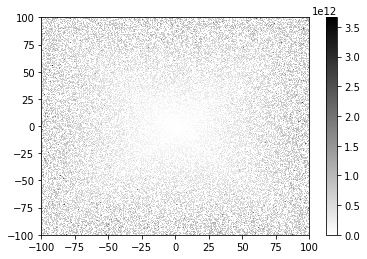

In [38]:
def condnoplot(xmin, xmax, ymin, ymax, res):
    # Define xgrid, ygrid
    xgrid = np.linspace(xmin, xmax, res)
    ygrid = np.linspace(ymin, ymax, res)
    cnums = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            A = np.array([[1, xgrid[i]], [ygrid[j], 1]])
            cnums[i, j] = estcondno(A)[1]
    plt.pcolormesh(xgrid, ygrid, cnums, cmap = 'gray_r')
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Conditioning Numbers: Res = {res}")
    plt.show()
condnoplot(-100, 100, -100, 100, 200)

## Exercise 5

In [74]:
def polyapproxplot(n):
    # Load data
    xk, yk = np.load("Data/stability_data.npy").T
    A = np.vander(xk, n+1)
    # Solve normal equations
    ATAinvAT  = la.inv(A.T @ A) @ A.T
    c_normal = ATAinvAT @ yk
    c_normal_yhat = np.polyval(c_normal, xk)
    # QR Decomp
    Q, R = la.qr(A, mode = 'economic')
    c_qr = la.solve_triangular(R, Q.T @ yk)
    c_qr_yhat = np.polyval(c_qr, xk)

    #plot
    xgrid = np.linspace(0, 1, 400)
    plt.plot(xk, yk, "ko")
    plt.plot(xk, c_normal_yhat, linewidth = 3.0, label = "Normal Equations")
    plt.plot(xk, c_qr_yhat, linewidth = 3.0, label = "QR")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial approximations of Degree {n}')
    plt.legend()
    plt.show()

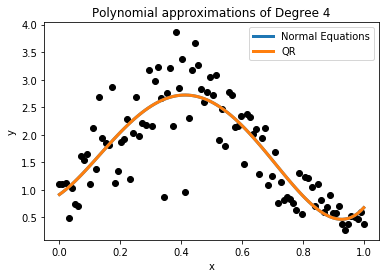

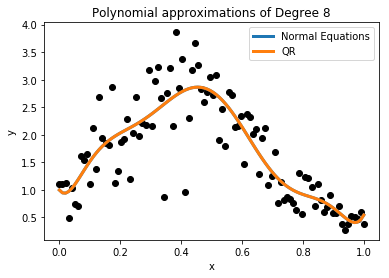

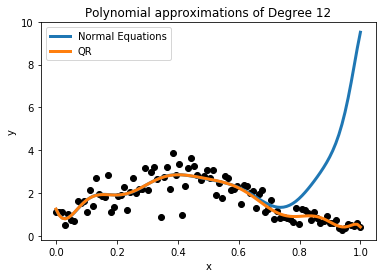

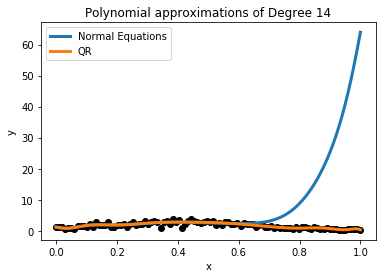

In [75]:
polyapproxplot(4)
polyapproxplot(8)
polyapproxplot(12)
polyapproxplot(14)

The second method is not stable, since there is a subtraction between two very large floats


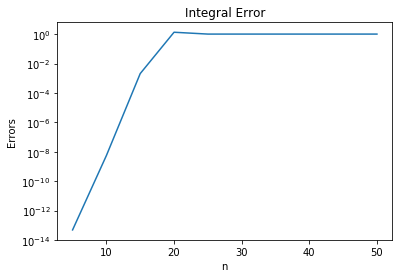

In [111]:
ns = np.linspace(5, 50, 10)
x = sy.Symbol('x')

errors = []

for n in ns:
    n = np.int(n)
    # Compute first integral
    int1 = sy.integrate((x**n) * math.e ** (x-1), (x, 0, 1))
    # Compute second integral
    int2 =(-1)**n * sy.subfactorial(n) + (-1)**(n+1) * sy.factorial(n) / math.e
    # Compute Relative Error (assuming first way is "correct")
    relerror = abs(int1 - int2) / abs(int1)
    errors.append(relerror)
    
plt.plot(ns, errors)
plt.title('Integral Error')
plt.xlabel('n')
plt.ylabel('Errors')
plt.yscale('log')
print("The second method is not stable, since there is a subtraction between two very large floats")
